## Observing the twitter dataset

In [1]:
import pandas as pd
df = pd.read_csv('twitter.csv')

In [2]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
# some random tweet texts
 
print(df['tweet'].iloc[6],"\n")
print(df['tweet'].iloc[9],"\n")
print(df['tweet'].iloc[12],"\n")

 @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦ 

 @user @user welcome here !  i'm   it's so #gr8 !  

i get to see my daddy today!!   #80days #gettingfed 



## Processing the text in tweets

In [5]:
# necessary libraries and modules
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE)  # removing URLs from the tweet
    tweet = re.sub(r'\@w+|\#','', tweet)    # removing mentions and hashtags
    tweet = re.sub(r'[^\w\s]','',tweet)     # removing all punctuation and special characters
    tweet = re.sub(r'ð','',tweet)           # removing any instances of the character ð
    tweet_tokens = word_tokenize(tweet)     # splitting the cleaned tweet into individual words (tokens)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]          # creating a new list filtered_tweets that includes only the tokens (w) from tweet_tokens that are not in stop_words ("and", "the", "is")
    return " ".join(filtered_tweets)        # joining the filtered tokens back into a single string

In [7]:
df.tweet = df['tweet'].apply(data_processing)   # assigning the result of the apply(data_processing) operation back to the tweet column of the df dataframe

In [8]:
df = df.drop_duplicates('tweet')    # removing duplicate rows from the DataFrame

In [9]:
lemmatizer = WordNetLemmatizer()    # NLTK library to perform lemmatization, which is the process of reducing words to their base or root form (saying -> say, better -> good)
def lemmatizing(data):              # data will be some iterable -> tweet column
    tweet = [lemmatizer.lemmatize(word) for word in data]   # 
    return data

In [10]:
df['tweet'] = df['tweet'].apply(lambda x: lemmatizing(x))   # passing each tweet from the 'tweet' column through the lemmatizing function

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29345 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      29345 non-null  int64 
 1   label   29345 non-null  int64 
 2   tweet   29345 non-null  object
dtypes: int64(2), object(1)
memory usage: 917.0+ KB


In [12]:
df['label'].value_counts()

0    27352
1     1993
Name: label, dtype: int64

In [13]:
# tweet texts after preprocessing
print(df['tweet'].iloc[6],"\n")
print(df['tweet'].iloc[9],"\n")
print(df['tweet'].iloc[12],"\n")

user camping tomorrow user user user user user user user dannyâ 

user user welcome im gr8 

get see daddy today 80days gettingfed 



## Data visualization 

In [14]:
# necessary libraries and moduels
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from wordcloud import WordCloud

Text(0.5, 1.0, 'Labels of tweet')

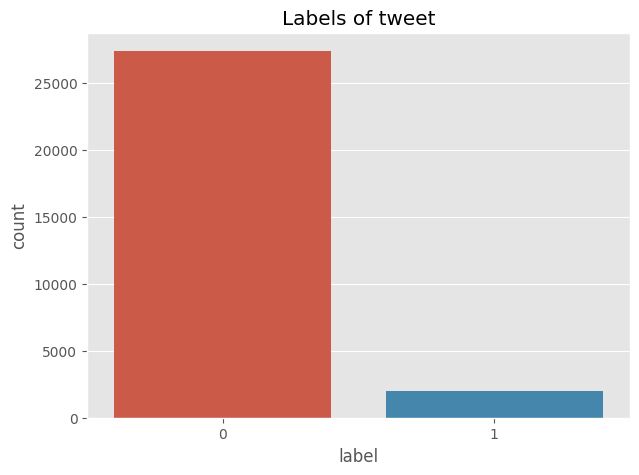

In [15]:
fig = plt.figure(figsize=(7,5))
sns.countplot(x='label', data = df)
plt.title('Labels of tweet')

Text(0.5, 1.0, 'Percentage distribution of sentiments: Hate vs Non-hate')

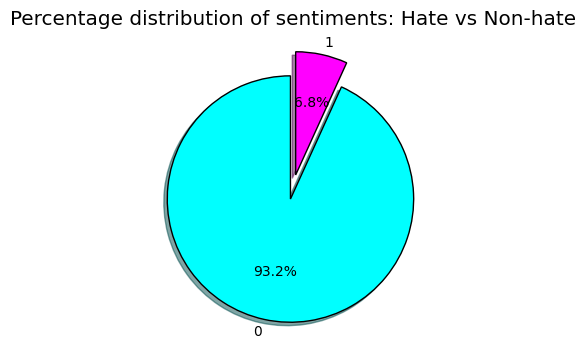

In [16]:
fig = plt.figure(figsize=(4,4))
colors = ("cyan", "magenta")
wp = {'linewidth':1, 'edgecolor':"black"}
tags = df['label'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, wedgeprops = wp, explode = explode, label='')
plt.title('Percentage distribution of sentiments: Hate vs Non-hate')

### Word cloud for the tweet sentiments

In [17]:
hate_tweets = df[df.label == 1]
hate_tweets.head()

,id,label,tweet
13,14,1,user cnn calls michigan middle school build wa...
14,15,1,comment australia opkillingbay seashepherd hel...
17,18,1,retweet agree
23,24,1,user user lumpy says prove lumpy
34,35,1,unbelievable 21st century wed need something l...


In [18]:
non_hate_tweets = df[df.label == 0]
non_hate_tweets.head()

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


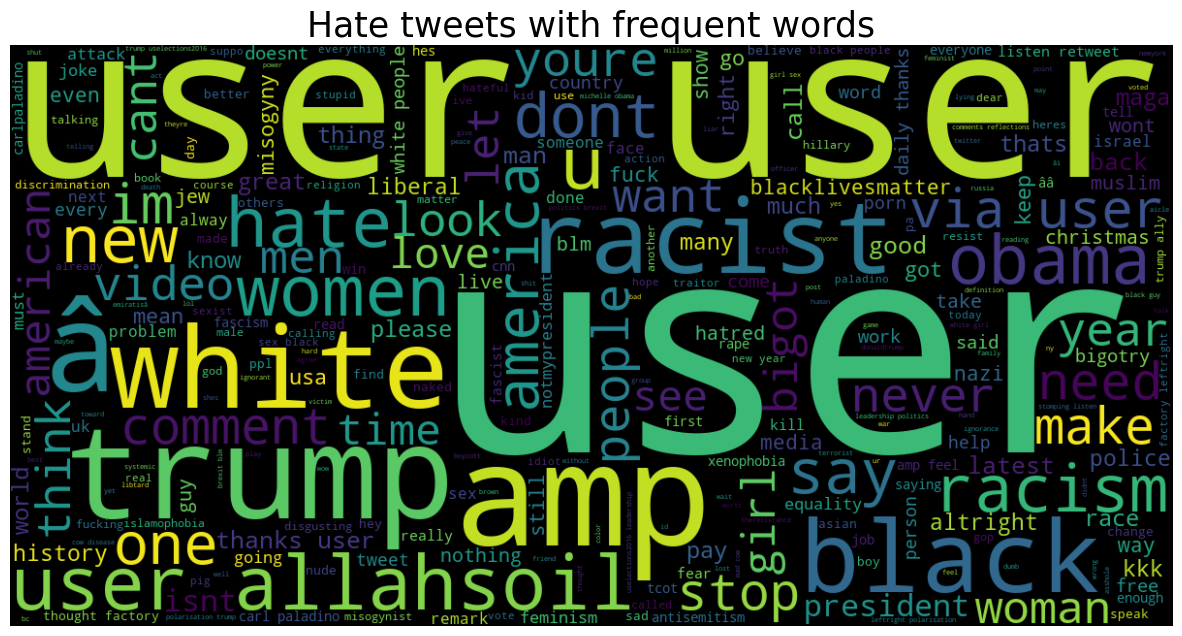

In [19]:
# Word cloud for the tweets with hate words
text = ' '.join([word for word in hate_tweets['tweet']])
plt.figure(figsize=(15,10), facecolor='None')
wordcloud = WordCloud(max_words=300, width=1200, height=600).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hate tweets with frequent words', fontsize = 25)
plt.show()

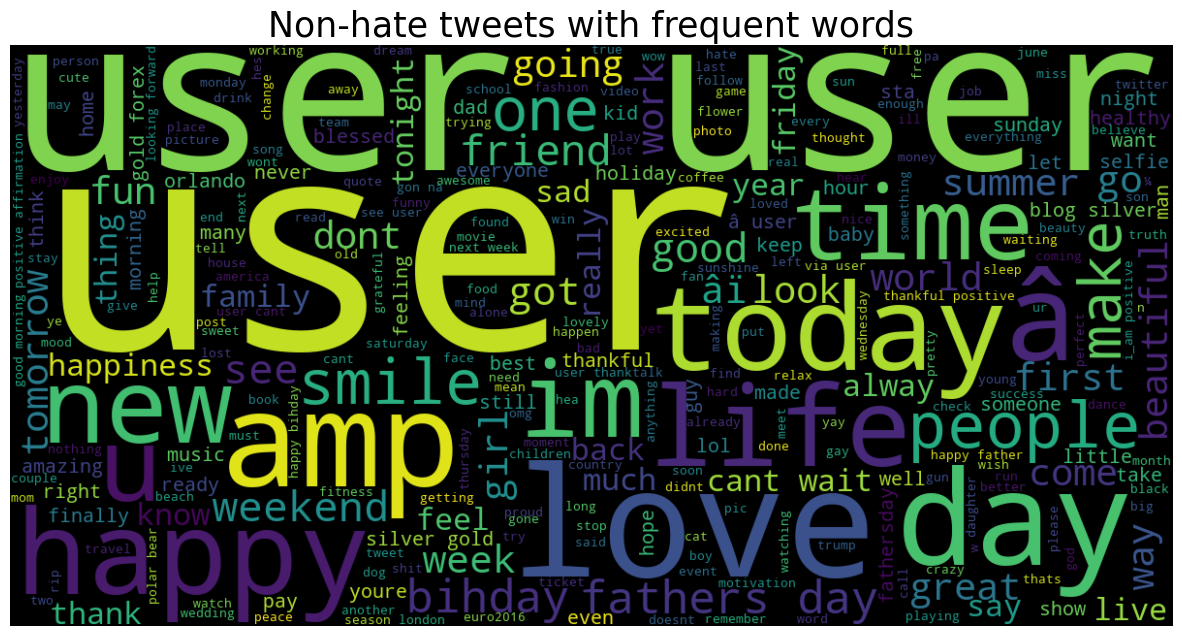

In [20]:
# Word cloud for the tweets with non-hate words
text = ' '.join([word for word in non_hate_tweets['tweet']])
plt.figure(figsize=(15,10), facecolor='None')
wordcloud = WordCloud(max_words=300, width=1200, height=600).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Non-hate tweets with frequent words', fontsize = 25)
plt.show()

In [21]:
# using a class in the sklearn.feature_extraction.text module which converts a collection of raw documents (the tweets) into a matrix of TF-IDF features
# TF-IDF is a statistical measure that emphasizes words that are more frequent in a specific document (tweet) but less frequent across the entire corpus
# 'ngram_range' defines the range of n-values for different n-grams to be extracted. 
# (1,3) means that the vectorizer will consider unigrams (single words - 'I', 'love', 'dogs'), bigrams (sequence of two words- 'I love', 'love dogs') and trigrams (sequence of three words- 'I love dogs') when generating features
# during fitting, the vectorizer goes through each tweet in the df['tweet'] column and builds a vocabulary of the unigrams and bigrams found, and also calculates the IDF values for each term
vect = TfidfVectorizer(ngram_range=(1,3)).fit(df['tweet'])

In [22]:
feature_names = vect.get_feature_names_out()        # retrieving the list of all feature names (n-grams) that the TfidfVectorizer object vect learned during the fitting, and the output is a list of features
print("Total number of features learned: {}\n".format(len(feature_names)))
print("Starting 40 features learned: \n{}".format(feature_names[:40]))

Total number of features learned: 380305

Starting 40 features learned: 
['0000001' '0000001 polluting' '0000001 polluting niger' '00027'
 '00027 photooftheday' '00027 photooftheday music' '001' '0035' '00h30'
 '01' '01 4995' '01 4995 rustic' '01 7900' '01 7900 shopalyssas' '01 blog'
 '01 blog silver' '01 croatia' '01 croatia happy' '01 may' '01 may actual'
 '01 may blog' '01 may previous' '01 shopalyssas'
 '01 shopalyssas upsideofflorida' '0115' '0115 8599968'
 '0115 8599968 revamp' '0161' '0161 manny' '0161 manny map' '019'
 '019 previous' '019 previous 0265' '01926889917' '02' '02 05' '02 05 may'
 '02 academy' '02 academy night' '02 animation']


## Model building

In [23]:
# necessary libraries and modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [24]:
X = df['tweet']
X = vect.transform(X)   # transforming the tweet text data into a numerical matrix using the TfidfVectorizer that was previously fitted
Y = df['label']

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
# checking the dimensions
print("Size of X_train:", (X_train.shape))
print("Size of Y_train:", (Y_train.shape))
print("Size of X_test: ", (X_test.shape))
print("Size of Y_test: ", (Y_test.shape))

Size of X_train: (23476, 380305)
Size of Y_train: (23476,)
Size of X_test:  (5869, 380305)
Size of Y_test:  (5869,)


In [27]:
# using logistic regression for the classification into hate and non-hate tweets
logic_reg = LogisticRegression()
logic_reg.fit(X_train, Y_train)
logic_reg_predict = logic_reg.predict(X_test)

In [28]:
logic_reg_acc = accuracy_score(logic_reg_predict, Y_test)
print("Test accuarcy: {:.2f}%".format(logic_reg_acc*100))

Test accuarcy: 93.17%


In [29]:
print(classification_report(Y_test, logic_reg_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      5458
           1       1.00      0.02      0.05       411

    accuracy                           0.93      5869
   macro avg       0.97      0.51      0.51      5869
weighted avg       0.94      0.93      0.90      5869



In [30]:
print(confusion_matrix(Y_test, logic_reg_predict))

[[5458    0]
 [ 401   10]]


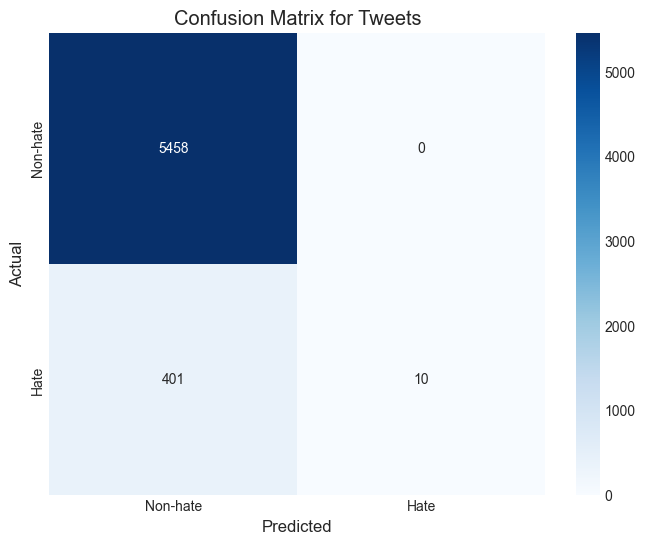

In [31]:
cm = confusion_matrix(Y_test, logic_reg_predict, labels=logic_reg.classes_)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-hate', 'Hate'], yticklabels=['Non-hate', 'Hate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tweets')
plt.show()

### Choosing the best hyperparameter values

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
# choosing gridsearch values to find optimal hyperparameter values
param_grid = {'C':[1000, 500, 100, 50, 10, 5.0, 1.0], 'solver' :['newton-cg', 'lbfgs', 'saga']}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv = 5, n_jobs=-1)
grid.fit(X_train, Y_train)

print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best Cross validation score: 0.95
Best parameters:  {'C': 1000, 'solver': 'saga'}


In [34]:
Y_optimal_pred = grid.predict(X_test)

In [35]:
logreg_acc = accuracy_score(Y_optimal_pred, Y_test)
print("Final test set accuracy: {:.2f}%".format(logreg_acc*100))

Final test set accuracy: 95.14%


In [36]:
print(classification_report(Y_test, Y_optimal_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5458
           1       0.94      0.33      0.48       411

    accuracy                           0.95      5869
   macro avg       0.95      0.66      0.73      5869
weighted avg       0.95      0.95      0.94      5869



In [37]:
print(confusion_matrix(Y_test, Y_optimal_pred))

[[5450    8]
 [ 277  134]]


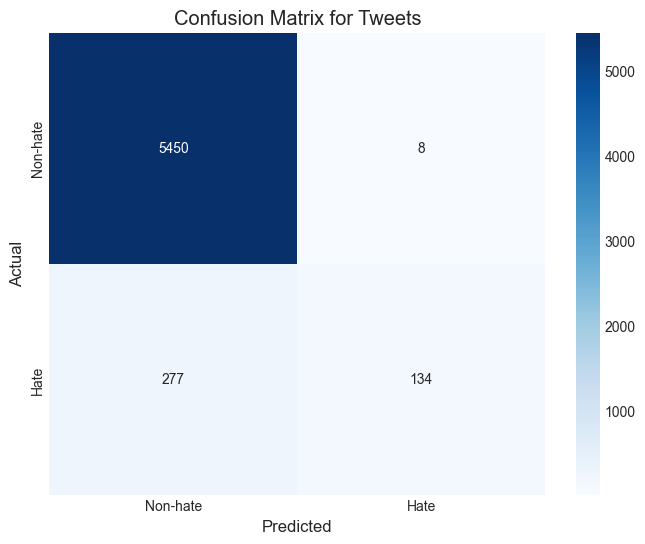

In [38]:
cm = confusion_matrix(Y_test, Y_optimal_pred, labels=logic_reg.classes_)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-hate', 'Hate'], yticklabels=['Non-hate', 'Hate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tweets')
plt.show()